#### Upgrade Propensity Model

##### Problem Statement:

In this task, we ask you to do an analysis to predict what customers will be most likely to upgrade
We provide a small sample of data you build the propensity model with.


In [74]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


##### Data Exploration

In [75]:
# Reading the two data sets provided for the analysis

df_data = pd.read_excel("DATA.xlsx",engine='openpyxl')
df_upgrade = pd.read_excel("UPGRADES.xlsx",engine='openpyxl')

In [76]:
df_data.head(3)


,SUBSCRIPTION_KEY,AVERAGE_SPEND,VOICE_OFFNET_CNT_L3M,VOICE_OFFNET_DUR_L3M,VOICE_OUTBOUND_ROAM_CNT_L3M,SMS_OFFNET_CNT_L3M,SMS_OUTBOUND_ROAM_CNT_L3M,DATA_CNT_L3M,DATA_VOLUME_L3M,NUM_OF_UPGRADES,HANDSET_FIRST_DATE,HANDSET_LATEST_DATE,LOYALTY_FLAG,SEGMENT,TOPUP_VALUE_L3M,TOPUP_CNT_L3M,CALLS_CARE_CNTS_L6M,AUTO_TOPUP
0,462713,2.71,6,283,0.0,2,0.0,0.0,0.0,2.0,2015-09-26,2016-01-07,No,Segment3,8.1301,1.0,0.0,N
1,272924,16.26,3,34,1.0,13,9.0,0.0,0.0,0.0,2015-07-24,2016-01-07,Yes,Segment4,48.7806,3.0,1.0,N
2,319500,5.42,15,"2,477",0.0,36,0.0,0.0,0.0,0.0,2012-09-04,2016-01-07,No,Segment2,16.2602,1.0,0.0,N


In [77]:
df_upgrade.head(3)

,SUBSCRIPTION_KEY,UPGRADE_FLAG
0,462713,NO
1,272924,NO
2,319500,NO


In [78]:
print("shape of data data set is: ",df_data.shape)
print("shape of upgarde data set is: ",df_upgrade.shape)

shape of data data set is:  (10350, 18)
shape of upgarde data set is:  (10350, 2)


In [79]:
df = pd.merge(df_data, df_upgrade, how="left", on=["SUBSCRIPTION_KEY"])

In [80]:
print("Shape of merged data set is: ",df.shape)

Shape of merged data set is:  (10350, 19)


In [81]:
df.head(3)

,SUBSCRIPTION_KEY,AVERAGE_SPEND,VOICE_OFFNET_CNT_L3M,VOICE_OFFNET_DUR_L3M,VOICE_OUTBOUND_ROAM_CNT_L3M,SMS_OFFNET_CNT_L3M,SMS_OUTBOUND_ROAM_CNT_L3M,DATA_CNT_L3M,DATA_VOLUME_L3M,NUM_OF_UPGRADES,HANDSET_FIRST_DATE,HANDSET_LATEST_DATE,LOYALTY_FLAG,SEGMENT,TOPUP_VALUE_L3M,TOPUP_CNT_L3M,CALLS_CARE_CNTS_L6M,AUTO_TOPUP,UPGRADE_FLAG
0,462713,2.71,6,283,0.0,2,0.0,0.0,0.0,2.0,2015-09-26,2016-01-07,No,Segment3,8.1301,1.0,0.0,N,NO
1,272924,16.26,3,34,1.0,13,9.0,0.0,0.0,0.0,2015-07-24,2016-01-07,Yes,Segment4,48.7806,3.0,1.0,N,NO
2,319500,5.42,15,"2,477",0.0,36,0.0,0.0,0.0,0.0,2012-09-04,2016-01-07,No,Segment2,16.2602,1.0,0.0,N,NO


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350 entries, 0 to 10349
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SUBSCRIPTION_KEY             10350 non-null  int64         
 1   AVERAGE_SPEND                10300 non-null  float64       
 2   VOICE_OFFNET_CNT_L3M         10350 non-null  int64         
 3   VOICE_OFFNET_DUR_L3M         10350 non-null  object        
 4   VOICE_OUTBOUND_ROAM_CNT_L3M  10300 non-null  float64       
 5   SMS_OFFNET_CNT_L3M           10350 non-null  object        
 6   SMS_OUTBOUND_ROAM_CNT_L3M    10300 non-null  float64       
 7   DATA_CNT_L3M                 10300 non-null  float64       
 8   DATA_VOLUME_L3M              10300 non-null  float64       
 9   NUM_OF_UPGRADES              10300 non-null  float64       
 10  HANDSET_FIRST_DATE           10350 non-null  datetime64[ns]
 11  HANDSET_LATEST_DATE          10350 non-nu

In [83]:
df.isnull().sum()

SUBSCRIPTION_KEY                0
AVERAGE_SPEND                  50
VOICE_OFFNET_CNT_L3M            0
VOICE_OFFNET_DUR_L3M            0
VOICE_OUTBOUND_ROAM_CNT_L3M    50
SMS_OFFNET_CNT_L3M              0
SMS_OUTBOUND_ROAM_CNT_L3M      50
DATA_CNT_L3M                   50
DATA_VOLUME_L3M                50
NUM_OF_UPGRADES                50
HANDSET_FIRST_DATE              0
HANDSET_LATEST_DATE             0
LOYALTY_FLAG                   50
SEGMENT                        50
TOPUP_VALUE_L3M                50
TOPUP_CNT_L3M                  50
CALLS_CARE_CNTS_L6M            50
AUTO_TOPUP                     50
UPGRADE_FLAG                    0
dtype: int64

In [84]:
# checking for duplicates in the data set
print('Total number of duplicate values in the data set is/are: {}'.format(df.duplicated().sum()))

Total number of duplicate values in the data set is/are: 0


In [85]:
#checking for imbalance in the data set
df['UPGRADE_FLAG'].value_counts()

NO     10000
YES      350
Name: UPGRADE_FLAG, dtype: int64

##### Data Cleaning

In [86]:
# # SMS_OFFNET_CNT_L3M , VOICE_OFFNET_DUR_L3M , HANDSET_FIRST_DATE , HANDSET_LATEST_DATE , LOYALTY_FLAG , 
# # SEGMENT , AUTO_TOPUP , UPGRADE_FLAG

# df.HANDSET_FIRST_DATE.unique()

In [87]:
# df.AUTO_TOPUP.value_counts()

In [88]:
# removing the white spaces before the numbers for column SMS_OFFNET_CNT_L3M
df.SMS_OFFNET_CNT_L3M = df.SMS_OFFNET_CNT_L3M.str.strip()

In [89]:
# converting the type of the columns from object to int
df.SMS_OFFNET_CNT_L3M = df.SMS_OFFNET_CNT_L3M.str.replace(",","",regex=True) # removed , from the numbers that is 2,123 will be 2123 now
df.SMS_OFFNET_CNT_L3M = df.SMS_OFFNET_CNT_L3M.apply(pd.to_numeric) # converting it to numeric field
# df.SMS_OFFNET_CNT_L3M.unique()

In [90]:
# removing the white spaces before the numbers for column VOICE_OFFNET_DUR_L3M
df.VOICE_OFFNET_DUR_L3M = df.VOICE_OFFNET_DUR_L3M.str.strip()

In [91]:
# converting the type of the columns from object to int
df.VOICE_OFFNET_DUR_L3M = df.VOICE_OFFNET_DUR_L3M.str.replace(",","",regex=True) # removed , from the numbers that is 2,123 will be 2123 now
df.VOICE_OFFNET_DUR_L3M = df.VOICE_OFFNET_DUR_L3M.apply(pd.to_numeric) # converting it to numeric field
# df.VOICE_OFFNET_DUR_L3M.unique()

In [92]:
# replacing nan values of LOYALTY_FLAG field with No
df.LOYALTY_FLAG = df.LOYALTY_FLAG.replace(np.nan,"No",regex=True)

In [93]:
# converting yes and no to 0 and 1
df.LOYALTY_FLAG = df.LOYALTY_FLAG.replace({'No':0, 'Yes':1})

In [94]:
# replacing nan values of SEGMENT field with UNKNOWN
df.SEGMENT = df.SEGMENT.replace(np.nan,"UNKNOWN",regex=True)

In [95]:
# converting segments to numeric values
df.SEGMENT = df.SEGMENT.replace({'Segment1':1, 'Segment2':2,'Segment3':3,'Segment4':4,'UNKNOWN':5})

In [96]:
# replacing nan values of AUTO_TOPUP field with N
df.AUTO_TOPUP = df.AUTO_TOPUP.replace(np.nan,"N",regex=True)

In [97]:
# converting yes and no to 0 and 1
df.AUTO_TOPUP = df.AUTO_TOPUP.replace({'N':0, 'Y':1})

In [98]:
#converting No and yes to 0 and 1
df.UPGRADE_FLAG = df.UPGRADE_FLAG.replace({'NO':0, 'YES':1})

In [99]:
# droping two columns since it has only one value
df.drop(['DATA_CNT_L3M','DATA_VOLUME_L3M'],inplace = True, axis = 1)

In [100]:
# mode imputation in some column for null values
col_mode = ['NUM_OF_UPGRADES','TOPUP_CNT_L3M','CALLS_CARE_CNTS_L6M']

for i in col_mode:
    df[i]=  df[i].fillna((df[i].mode()[0]))

In [101]:
# mean imputation in some column for null values
col_mean = ['AVERAGE_SPEND','VOICE_OUTBOUND_ROAM_CNT_L3M','SMS_OUTBOUND_ROAM_CNT_L3M','TOPUP_VALUE_L3M']

for i in col_mean:
    df[i].fillna((df[i].mean()),inplace = True)

In [102]:
df.dtypes

SUBSCRIPTION_KEY                        int64
AVERAGE_SPEND                         float64
VOICE_OFFNET_CNT_L3M                    int64
VOICE_OFFNET_DUR_L3M                    int64
VOICE_OUTBOUND_ROAM_CNT_L3M           float64
SMS_OFFNET_CNT_L3M                      int64
SMS_OUTBOUND_ROAM_CNT_L3M             float64
NUM_OF_UPGRADES                       float64
HANDSET_FIRST_DATE             datetime64[ns]
HANDSET_LATEST_DATE            datetime64[ns]
LOYALTY_FLAG                            int64
SEGMENT                                 int64
TOPUP_VALUE_L3M                       float64
TOPUP_CNT_L3M                         float64
CALLS_CARE_CNTS_L6M                   float64
AUTO_TOPUP                              int64
UPGRADE_FLAG                            int64
dtype: object

In [103]:
df.isnull().sum()

SUBSCRIPTION_KEY               0
AVERAGE_SPEND                  0
VOICE_OFFNET_CNT_L3M           0
VOICE_OFFNET_DUR_L3M           0
VOICE_OUTBOUND_ROAM_CNT_L3M    0
SMS_OFFNET_CNT_L3M             0
SMS_OUTBOUND_ROAM_CNT_L3M      0
NUM_OF_UPGRADES                0
HANDSET_FIRST_DATE             0
HANDSET_LATEST_DATE            0
LOYALTY_FLAG                   0
SEGMENT                        0
TOPUP_VALUE_L3M                0
TOPUP_CNT_L3M                  0
CALLS_CARE_CNTS_L6M            0
AUTO_TOPUP                     0
UPGRADE_FLAG                   0
dtype: int64

In [104]:
df.shape

(10350, 17)

##### Feature Engineering

In [105]:
#calculating the total number of days for which user had the device
df['Number_of_Days'] = (df['HANDSET_LATEST_DATE'] - df['HANDSET_FIRST_DATE']).dt.days

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SUBSCRIPTION_KEY,10350.0,238842.335362,137379.999580,4.0000,120194.2500,238182.0000,357392.2500,477531.0000
AVERAGE_SPEND,10350.0,10.210563,5.464593,1.3500,5.4200,10.8400,16.2600,46.0700
VOICE_OFFNET_CNT_L3M,10350.0,14.447729,21.641523,0.0000,0.0000,5.0000,19.0000,204.0000
VOICE_OFFNET_DUR_L3M,10350.0,896.627343,1478.099922,0.0000,0.0000,228.5000,1161.0000,18873.0000
VOICE_OUTBOUND_ROAM_CNT_L3M,10350.0,1.683107,7.258700,0.0000,0.0000,0.0000,0.0000,380.0000
SMS_OFFNET_CNT_L3M,10350.0,63.911014,205.481564,0.0000,0.0000,9.0000,50.0000,6538.0000
SMS_OUTBOUND_ROAM_CNT_L3M,10350.0,2.631942,16.101937,0.0000,0.0000,0.0000,0.0000,681.0000
NUM_OF_UPGRADES,10350.0,0.071594,0.290266,0.0000,0.0000,0.0000,0.0000,3.0000
LOYALTY_FLAG,10350.0,0.323478,0.467826,0.0000,0.0000,0.0000,1.0000,1.0000
SEGMENT,10350.0,2.573237,1.014628,1.0000,2.0000,3.0000,3.0000,5.0000


In [107]:
df.query('HANDSET_FIRST_DATE > HANDSET_LATEST_DATE')

,SUBSCRIPTION_KEY,AVERAGE_SPEND,VOICE_OFFNET_CNT_L3M,VOICE_OFFNET_DUR_L3M,VOICE_OUTBOUND_ROAM_CNT_L3M,SMS_OFFNET_CNT_L3M,SMS_OUTBOUND_ROAM_CNT_L3M,NUM_OF_UPGRADES,HANDSET_FIRST_DATE,HANDSET_LATEST_DATE,LOYALTY_FLAG,SEGMENT,TOPUP_VALUE_L3M,TOPUP_CNT_L3M,CALLS_CARE_CNTS_L6M,AUTO_TOPUP,UPGRADE_FLAG,Number_of_Days
5,403148,5.42,0,0,0.0,0,0.0,0.0,2018-10-02,2016-01-07,0,3,16.2602,1.0,0.0,0,0,-999
1222,44696,2.71,6,204,0.0,1,0.0,0.0,2018-10-02,2016-01-07,0,4,8.1301,1.0,0.0,0,0,-999
1433,165374,5.42,2,18,0.0,27,0.0,0.0,2018-10-02,2016-01-07,0,3,16.2602,1.0,0.0,0,0,-999
1582,376918,10.84,0,0,0.0,0,0.0,0.0,2018-10-02,2016-01-07,1,2,16.2602,1.0,0.0,0,0,-999
1982,117162,16.26,0,0,0.0,0,2.0,0.0,2018-10-02,2016-01-07,1,3,48.7806,3.0,0.0,0,0,-999
2126,272853,2.71,1,31,7.0,2,8.0,0.0,2018-10-02,2016-01-07,0,3,8.1301,1.0,0.0,0,0,-999
2214,191510,21.68,48,4991,0.0,26,0.0,0.0,2018-10-02,2016-01-07,0,3,65.0408,4.0,0.0,0,0,-999
3161,215614,1.36,0,0,0.0,0,0.0,0.0,2018-10-02,2016-01-07,0,3,4.0650,1.0,0.0,0,0,-999
3424,9938,5.42,10,5053,0.0,6,0.0,0.0,2018-10-02,2016-01-07,0,2,16.2602,1.0,0.0,0,0,-999
3658,146806,10.84,17,4175,0.0,2,0.0,0.0,2018-10-02,2016-01-07,0,2,32.5204,2.0,0.0,0,1,-999


In [108]:
#droping the unneccessary columns from the data set
df.drop(['HANDSET_LATEST_DATE','HANDSET_FIRST_DATE'],inplace =True,axis = 1)

In [109]:
# Fetching the index for which Number of days is negative and is equal to -999
index_to_drop = df.query('Number_of_Days == -999').index

In [110]:
# dropping the invalid rows from the data set
df.drop(labels = index_to_drop,inplace = True)

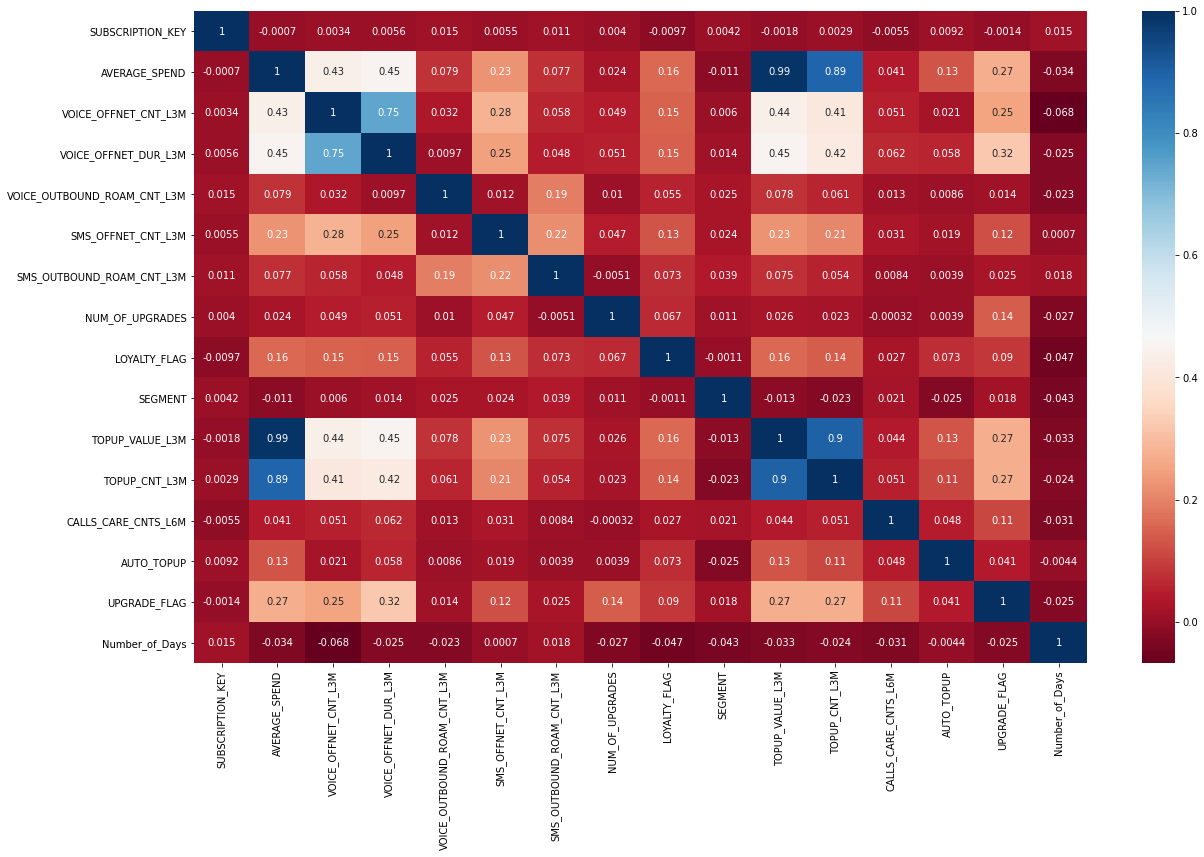

In [111]:
# Checking for multicollinearity

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap='RdBu',annot=True);

In [112]:
# Calculating VIF
vif_product = pd.DataFrame()
vif_product["features"]= df.columns
vif_product["VIF"] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [113]:
print(vif_product)

                       features         VIF
0              SUBSCRIPTION_KEY    3.318673
1                 AVERAGE_SPEND  221.717145
2          VOICE_OFFNET_CNT_L3M    3.482914
3          VOICE_OFFNET_DUR_L3M    3.384063
4   VOICE_OUTBOUND_ROAM_CNT_L3M    1.106825
5            SMS_OFFNET_CNT_L3M    1.272472
6     SMS_OUTBOUND_ROAM_CNT_L3M    1.126674
7               NUM_OF_UPGRADES    1.086209
8                  LOYALTY_FLAG    1.536897
9                       SEGMENT    4.374245
10              TOPUP_VALUE_L3M  242.879568
11                TOPUP_CNT_L3M   24.997219
12          CALLS_CARE_CNTS_L6M    1.050567
13                   AUTO_TOPUP    1.042774
14                 UPGRADE_FLAG    1.209017
15               Number_of_Days    2.088105


VIF is very high for some of the features and also we can see that their is multicolinearity in the data set. We can also see that their is difference in range of values for different features so before applying model we have to perform two steps that are:    
1) Scaling of The Data Set         
2) Dropping some of the columns which is having high VIF

In [114]:
#since average spend is made up of total value and total count so we can drop these two columns
df.drop(['TOPUP_VALUE_L3M','TOPUP_CNT_L3M'],inplace = True, axis =1)

##### Splitting the Data Set in train and test before performing any changes 

In [115]:
# Spliting the data set into 70-30 
X = df.copy()
X.drop(['SUBSCRIPTION_KEY','UPGRADE_FLAG'],inplace = True, axis = 1)
y = df.iloc[:,12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1)

In [116]:
# imbalance in train set
Counter(y_train)

Counter({0: 6983, 1: 244})

We can See that their is imbalance in the data set so we have to perform some sampling techniques otherwise our model will only predict the majority class. We will also use different metric then Accuracy for model validation.

In [117]:
over = RandomOverSampler(sampling_strategy=0.3,random_state = 1)
under = RandomUnderSampler(sampling_strategy=0.5, random_state = 1)
scaler = MinMaxScaler(feature_range=(0, 1))
steps = [('o', over), ('u', under),('s',scaler), ('m', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_validate(pipeline, X_train, y_train, scoring=['f1_micro','precision','recall'], cv=cv, n_jobs=-1)
# pd.DataFrame(scores)

In [118]:
model = pipeline.fit(X_train,y_train)

In [119]:
y_pred = model.predict(X_test)

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2993
           1       0.22      0.66      0.33       105

    accuracy                           0.91      3098
   macro avg       0.60      0.79      0.64      3098
weighted avg       0.96      0.91      0.93      3098



In [121]:
confusion_matrix(y_test,y_pred)

array([[2751,  242],
       [  36,   69]], dtype=int64)

In [122]:
y_pred_train = model.predict(X_train)

In [123]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      6983
           1       0.22      0.66      0.33       244

    accuracy                           0.91      7227
   macro avg       0.60      0.79      0.64      7227
weighted avg       0.96      0.91      0.93      7227



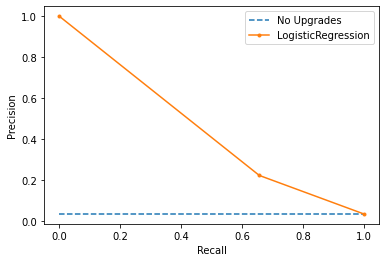

In [145]:
from matplotlib import pyplot
non_defaults = len(y_train[y_train==1]) / len(y_train)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [non_defaults, non_defaults], linestyle='--', label='No Upgrades')
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred)
pyplot.plot(recall, precision, marker='.', label='LogisticRegression')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [124]:
# confusion_matrix(y_train,y_pred_train)

In [132]:
# col = X_train.columns
# # Finding the important feature from the model
# importance = model.coef_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %s, Score: %.5f' % (col[i],v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [142]:
import eli5
col = list(X_train.columns)
eli5.explain_weights(model.named_steps['m'], top=15, feature_names=col)

Weight?,Feature
+8.143,AVERAGE_SPEND
+5.096,VOICE_OFFNET_DUR_L3M
+4.400,CALLS_CARE_CNTS_L6M
+3.581,NUM_OF_UPGRADES
+0.894,SMS_OFFNET_CNT_L3M
+0.524,VOICE_OFFNET_CNT_L3M
+0.453,VOICE_OUTBOUND_ROAM_CNT_L3M
+0.432,SEGMENT
+0.421,LOYALTY_FLAG
+0.248,SMS_OUTBOUND_ROAM_CNT_L3M


In [138]:
list(X_train.columns)

['AVERAGE_SPEND',
 'VOICE_OFFNET_CNT_L3M',
 'VOICE_OFFNET_DUR_L3M',
 'VOICE_OUTBOUND_ROAM_CNT_L3M',
 'SMS_OFFNET_CNT_L3M',
 'SMS_OUTBOUND_ROAM_CNT_L3M',
 'NUM_OF_UPGRADES',
 'LOYALTY_FLAG',
 'SEGMENT',
 'CALLS_CARE_CNTS_L6M',
 'AUTO_TOPUP',
 'Number_of_Days']

In [126]:
df.head(3)

,SUBSCRIPTION_KEY,AVERAGE_SPEND,VOICE_OFFNET_CNT_L3M,VOICE_OFFNET_DUR_L3M,VOICE_OUTBOUND_ROAM_CNT_L3M,SMS_OFFNET_CNT_L3M,SMS_OUTBOUND_ROAM_CNT_L3M,NUM_OF_UPGRADES,LOYALTY_FLAG,SEGMENT,CALLS_CARE_CNTS_L6M,AUTO_TOPUP,UPGRADE_FLAG,Number_of_Days
0,462713,2.71,6,283,0.0,2,0.0,2.0,0,3,0.0,0,0,103
1,272924,16.26,3,34,1.0,13,9.0,0.0,1,4,1.0,0,0,167
2,319500,5.42,15,2477,0.0,36,0.0,0.0,0,2,0.0,0,0,1220


In [129]:
# creating a plot using bokeh

# from bokeh.layouts import layout
# from bokeh.models import Div, RangeSlider, Spinner
# from bokeh.plotting import figure, show

# # prepare some data
# # x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# # y = [4, 5, 5, 7, 2, 6, 4, 9, 1, 3]

# # create plot with circle glyphs
# p = figure(x_range=(1, 9), plot_width=500, plot_height=250)
# points = p.circle(x=df.SEGMENT, y=df.UPGRADE_FLAG, size=30, fill_color="#21a7df")

# # set up textarea (div)
# div = Div(
#     text="""
#           <p>Select the circle's size using this control element:</p>
#           """,
#     width=200,
#     height=30,
# )

# # set up spinner
# spinner = Spinner(
#     title="Circle size",
#     low=0,
#     high=60,
#     step=5,
#     value=points.glyph.size,
#     width=200,
# )
# spinner.js_link("value", points.glyph, "size")

# # set up RangeSlider
# range_slider = RangeSlider(
#     title="Adjust x-axis range",
#     start=0,
#     end=10,
#     step=1,
#     value=(p.x_range.start, p.x_range.end),
# )
# range_slider.js_link("value", p.x_range, "start", attr_selector=0)
# range_slider.js_link("value", p.x_range, "end", attr_selector=1)

# # create layout
# layout = layout(
#     [
#         [div, spinner],
#         [range_slider],
#         [p],
#     ]
# )

# # show result
# show(layout)